In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("preprocessed_age.csv")
df.head()


,Unnamed: 0,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
0,1,Q42,douglas adams,male,artist,1952,2001,natural causes,49,united kingdom,[81.3]
1,2,Q91,abraham lincoln,male,politician,1809,1865,homicide,56,united states,[78.5]
2,6,Q272,paul morand,male,artist,1888,1976,NaN,88,france,[82.5]
3,7,Q296,claude monet,male,artist,1840,1926,natural causes,86,france,[82.5]
4,10,Q303,elvis presley,male,artist,1935,1977,natural causes,42,united states,[78.5]


In [4]:
# James H
# split data into training and testing

# train model

# test model

# plot results

# compare version of algorithms

In [5]:
print(df.columns[-1])

Associated Country Life Expectancy


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [7]:
df.head()

,Unnamed: 0,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
0,1,Q42,douglas adams,male,artist,1952,2001,natural causes,49,united kingdom,[81.3]
1,2,Q91,abraham lincoln,male,politician,1809,1865,homicide,56,united states,[78.5]
2,6,Q272,paul morand,male,artist,1888,1976,NaN,88,france,[82.5]
3,7,Q296,claude monet,male,artist,1840,1926,natural causes,86,france,[82.5]
4,10,Q303,elvis presley,male,artist,1935,1977,natural causes,42,united states,[78.5]


In [52]:
def apply_DT(df, split_size, target_column, unwanted, numerical):
    # Remove unwanted columns
    copy = df.copy()
    copy = copy.drop(unwanted, axis=1)

    # transform values into numerical
    if (numerical):
        le = LabelEncoder()
        for column in copy.columns:
            if (copy[column].dtype != "int64"):
                copy[column] = le.fit_transform(copy[column])

    # split to training and testing
    X = copy.drop(target_column, axis=1)
    y = copy[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size)
    
    # train decision tree
    model = DecisionTreeClassifier()
    model = model.fit(X_train, y_train)

    # test decision tree
    predictions = model.predict(X_test)
    
    # compare predictions with actual
    return y_test, predictions




In [75]:
labels = []
data = []

In [24]:
df.head()

,Unnamed: 0,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
0,1,Q42,douglas adams,male,artist,1952,2001,natural causes,49,united kingdom,[81.3]
1,2,Q91,abraham lincoln,male,politician,1809,1865,homicide,56,united states,[78.5]
2,6,Q272,paul morand,male,artist,1888,1976,NaN,88,france,[82.5]
3,7,Q296,claude monet,male,artist,1840,1926,natural causes,86,france,[82.5]
4,10,Q303,elvis presley,male,artist,1935,1977,natural causes,42,united states,[78.5]


### Can the age of death based on features like gender, occupation, birth year, and associated country be predicted?

Parameters apply_DT(dataframe, split size (testing), target column, unwanted Columns, convert values to numerical)

In [53]:
test_size = 0.30
target_column = "Age of death"
Unwanted = ["Unnamed: 0", "Id", "Death year"]

actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

0.027053799713532254


In [38]:
confusion_matrix(actual, predictions)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
precision_score(actual, predictions, average='macro')

c:\Users\James\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.019792315864289044

In [26]:
test_size = 0.30
target_column = "Age of death"
Unwanted = ["Unnamed: 0", "Id", "Birth year"]

actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

0.02624727253256228


In [27]:
test_size = 0.30
target_column = "Age of death"
Unwanted = ["Unnamed: 0", "Id"]

actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

0.9952445015595089


In [28]:
test_size = 0.30
target_column = "Age of death"
Unwanted = ["Unnamed: 0", "Id", "Death year", "Name"]

actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

0.03050078310108028


In [76]:
test_size = 0.10
target_column = "Age of death"
Unwanted = ["Unnamed: 0", "Id", "Death year", "Name", "Occupation"]
actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

labels.append(target_column)
data.append(accuracy)

0.03299064294606642


In [30]:
test_size = 0.10
target_column = "Age of death"
Unwanted = ["Unnamed: 0", "Id", "Death year", "Name", "Occupation", "Birth year"]
actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

0.028071161800730896


### Can the DT accurately classify the manner of death (e.g., natural causes, accidents) based on the available features?

In [40]:
df.head()

,Unnamed: 0,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
0,1,Q42,douglas adams,male,artist,1952,2001,natural causes,49,united kingdom,[81.3]
1,2,Q91,abraham lincoln,male,politician,1809,1865,homicide,56,united states,[78.5]
2,6,Q272,paul morand,male,artist,1888,1976,NaN,88,france,[82.5]
3,7,Q296,claude monet,male,artist,1840,1926,natural causes,86,france,[82.5]
4,10,Q303,elvis presley,male,artist,1935,1977,natural causes,42,united states,[78.5]


<class 'pandas.core.series.Series'>
RangeIndex: 996037 entries, 0 to 996036
Series name: Manner of death
Non-Null Count  Dtype 
--------------  ----- 
48863 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [45]:
df_mod = df.copy()
df_mod = df_mod.dropna(subset=['Manner of death'])

In [46]:
df_mod["Manner of death"].info()

<class 'pandas.core.series.Series'>
Int64Index: 48863 entries, 0 to 995988
Series name: Manner of death
Non-Null Count  Dtype 
--------------  ----- 
48863 non-null  object
dtypes: object(1)
memory usage: 763.5+ KB


In [80]:
test_size = 0.30
target_column = "Manner of death"
Unwanted = ["Unnamed: 0", "Id", "Death year"]
actual, predictions = apply_DT(df_mod, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

0.5838051708847807


In [81]:
test_size = 0.30
target_column = "Manner of death"
Unwanted = ["Unnamed: 0", "Id", "Birth year"]
actual, predictions = apply_DT(df_mod, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

0.6018828023739682


In [82]:
test_size = 0.3
target_column = "Manner of death"
Unwanted = ["Unnamed: 0", "Id", "Death year", "Associated Country Life Expectancy", "Name"]
actual, predictions = apply_DT(df_mod, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

labels.append(target_column)
data.append(accuracy)

0.5937649225731633


### Can the gender of the inidividual be predicted by death related factors?

In [68]:
test_size = 0.3
target_column = "Gender"
Unwanted = ["Unnamed: 0", "Id", "Death year"]
actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

#labels.append(target_column)
#data.append(accuracy)

0.8448556282880205


In [69]:
test_size = 0.3
target_column = "Gender"
Unwanted = ["Unnamed: 0", "Id", "Death year", "Name"]
actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

#labels.append(target_column)
#data.append(accuracy)

0.7065311968729502


In [70]:
test_size = 0.3
target_column = "Gender"
Unwanted = ["Unnamed: 0", "Id", "Death year", "Name", "Occupation"]
actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

#labels.append(target_column)
#data.append(accuracy)

0.7444178948636601


In [78]:
test_size = 0.3
target_column = "Gender"
Unwanted = ["Unnamed: 0", "Id", "Death year", "Name", "Occupation", "Associated Country Life Expectancy"]
actual, predictions = apply_DT(df, test_size, target_column, Unwanted, True)

accuracy = accuracy_score(actual, predictions)
print(accuracy)

labels.append(target_column)
data.append(accuracy)

0.7431093798107171


### Can any non-linear relationships be discerned between occupation type and age of death or manner of death?

### Can any outlier cases be identified / predicted, such as individuals who lived significantly longer or shorter than the average life expectancy of their associated country?

Text(0, 0.5, 'Accuracy %')

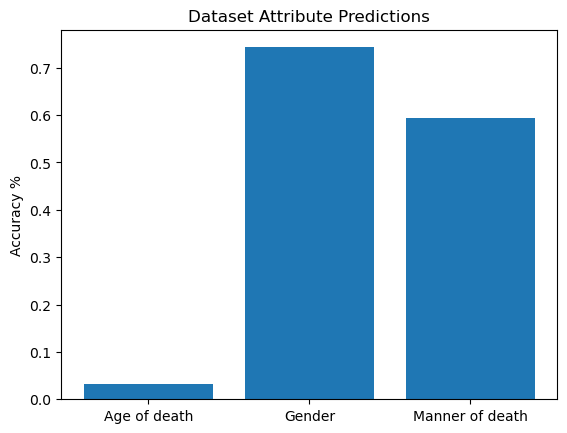

In [84]:
fig, ax = plt.subplots()
ax.bar(labels, data)
ax.set_title("Dataset Attribute Predictions")
ax.set_ylabel("Accuracy %")

In [85]:
df["Gender"].value_counts().unique

<bound method Series.unique of male                                              790843
female                                             92984
transgender female                                    79
transgender male                                      31
female; male                                           5
intersex                                               5
non-binary                                             2
transgender female; male                               2
transgender male; female                               2
intersex; female                                       2
transgender person; intersex; transgender male         1
transgender female; female                             1
intersex; transgender male                             1
eunuch; male                                           1
transgender male; male                                 1
transgender female; intersex                           1
female; female                                         1
